In this notebook, we will extract the necessary datafiles from the model to use in our labs personal analysis notebooks. Firstly, a progress.yaml file needs to be generated. 

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
#important imports
from os.path import join, dirname, abspath
from moseq2_app.gui.progress import update_progress, restore_progress_vars, progress_path_sanity_check
import pandas as pd
import openpyxl
import pickle
import numpy as np
from matplotlib import pyplot as plt 
import array
import seaborn as sns
import os

In [4]:
#settings window
picklename="scalar_df3_All.pickle" # the name of the pickled dataset of scalars used for heatmap generation
progress_filepath = '/mnt/Data1/Moseq_Processed/Data4/Analysis/progress.yaml' # Add the path to your progress.yaml here.
Parameters=["Genotype","Housing","Sex"] # these are the different parameters we will examine using our indexes
indexname='mouse_index_final.xlsx' # how we call our created index 
from_CLI = True# Keep True
progress_paths = restore_progress_vars(progress_file=progress_filepath, init=from_CLI, overwrite=from_CLI)

progress_path_sanity_check(progress_paths, progress_filepath)

progress_paths

Overwriting progress file with initial progress.
Generating progress path at: /mnt/Data1/Moseq_Processed/Data4/Analysis/progress.yaml
Unable to find PC score file. Either:
    1) run the pca step, or if you did
    2) manually add PCA paths using the update_progress function
Please ensure "pca_path" in moseq2-index.yaml is the path to pc_score h5 file before running interactive model analysis
Unable to find changepoint file. Either:
    1) run the pca step, or if you did
    2) manually add PCA paths using the update_progress function
Please check and correct the path in config_file. The default path should contain config.yaml
File names are not default values, please check if this is intentional
Please check and correct the path in train_data_dir. The default path should contain aggregate_results
File names are not default values, please check if this is intentional
Please check and correct the path in pca_dirname. The default path should contain _pca
File names are not default values

{'base_dir': '/mnt/Data1/Moseq_Processed/Data4/Analysis',
 'config_file': '',
 'session_config': '',
 'index_file': '/mnt/Data1/Moseq_Processed/Data4/Analysis/moseq2-index.yaml',
 'train_data_dir': '',
 'pca_dirname': '',
 'scores_filename': '',
 'scores_path': '',
 'changepoints_path': '',
 'model_path': '/mnt/Data1/Moseq_Processed/Data4/Analysis/model_output.p',
 'crowd_dir': '',
 'syll_info': '',
 'plot_path': '/mnt/Data1/Moseq_Processed/Data4/Analysis/plots/',
 'snapshot': '6a7ca047-afde-42e6-944a-8c38e1477d0a',
 'model_session_path': '/mnt/Data1/Moseq_Processed/Data4/Analysis',
 'base_model_path': '/mnt/Data1/Moseq_Processed/Data4/Analysis'}

In [5]:
from moseq2_app.util import setup_model_folders
model_dict = setup_model_folders(progress_paths)

/mnt/Data1/anaconda3/envs/moseq2-app/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/mnt/Data1/anaconda3/envs/moseq2-app/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.ht

Creating model folder for model_output.p


In [6]:
from moseq2_viz.util import parse_index
from moseq2_viz.scalars.util import scalars_to_dataframe

_, sorted_index = parse_index(progress_paths['index_file'])
# compute session scalar data
scalar_df = scalars_to_dataframe(sorted_index, model_path=progress_paths['model_path'])

print('scalar_df size: ', scalar_df.shape[0], 'rows;', scalar_df.shape[1], 'columns')

# this line prints out the first 5 rows of the dataframe in table format. It is used to
# get a sense of what is contained in the DataFrame
scalar_df.head()


scalar_df size:  30013448 rows; 31 columns


,angle,area_mm,area_px,centroid_x_mm,centroid_x_px,centroid_y_mm,centroid_y_px,height_ave_mm,length_mm,length_px,...,timestamps,frame index,SessionName,SubjectName,StartTime,labels (original),labels (usage sort),labels (frames sort),onset,syllable index
0,-0.090091,1255.881226,790.0,214.287750,392.564453,207.639435,340.943512,46.400002,81.724716,52.082729,...,8.605751e+08,0.0,01595-02,01595-02,2023-07-05T16:09:54.4276486+02:00,-5,-5,-5,True,0
1,0.085506,1230.445557,774.0,209.117691,389.269592,202.454300,337.723541,47.927650,76.212578,48.569874,...,8.605752e+08,1.0,01595-02,01595-02,2023-07-05T16:09:54.4276486+02:00,-5,-5,-5,False,1
2,0.246218,1203.420288,757.0,204.948425,386.612549,198.264465,335.121674,46.163803,72.815025,46.404633,...,8.605752e+08,2.0,01595-02,01595-02,2023-07-05T16:09:54.4276486+02:00,-5,-5,-5,False,2
3,0.401422,1177.984741,741.0,202.614410,385.125092,194.903656,333.034637,44.819164,70.081207,44.662380,...,8.605752e+08,3.0,01595-02,01595-02,2023-07-05T16:09:54.4276486+02:00,0,82,89,True,3
4,0.564345,1173.215576,738.0,201.015701,384.106232,191.882141,331.158264,41.971546,70.726448,45.073593,...,8.605753e+08,4.0,01595-02,01595-02,2023-07-05T16:09:54.4276486+02:00,6,52,86,True,4


In [7]:
# Save `scalar_df` as a csv file
from os.path import exists, join

# Specify the place you want to save the dataframe in `save_path`
save_path = progress_paths['base_dir']  # save the dataframe in the base data directory
# alternatively, you can save the dataframe in the model directory. Uncomment the following line to do so:
#ave_path = progress_paths['model_path']

# exports the dataframe
filename = picklename
# here we use .to_csv to export the dataframe, but you can change it to try other ways of saving your data
scalar_df.to_pickle(join(save_path, filename))

print('DataFrame is saved:', join(save_path, filename))

DataFrame is saved: /mnt/Data1/Moseq_Processed/Data4/Analysis/scalar_df3_All.pickle


In [8]:
data_pickle=open(join(save_path, filename),"rb")
data_contents=scalar_df
alluuids=data_contents["uuid"]
uuids,dataindex=np.unique(alluuids,return_index=True) #sort the mouse based on their original grouping (probably genotype)
groups=data_contents["group"][dataindex]
mouse=data_contents["SubjectName"][dataindex]
mouse=np.array(mouse)
mouse = mouse[np.argsort(groups)]
uuids=uuids[np.argsort(groups)]

Mousedict = {"uuid": uuids,'MouseNumber': mouse, 'Genotype': sorted(groups) } #create a dataframe to insert all of the groupings, original grouping is called Genotype from the start, but could be something else, in that case the name can be easily altered in the excel file
mouseframe = pd.DataFrame(Mousedict)
doubles=(set(Parameters)&set(["MouseNumber","Genotype"])) 
structure=Parameters.copy()
for i in doubles:
    structure.remove(i)
mouseframe = mouseframe.reindex(columns = mouseframe.columns.tolist() + structure)
if not(os.path.exists(join(save_path, indexname))):
    mouseframe.to_excel(join(save_path, indexname), index=False) #create in excel file to fill in the missing sorting data
    print('index is saved:', join(save_path, indexname))
else:
    print("Warning:filepath already exists, be careful to not overwrite files!")

index is saved: /mnt/Data1/Moseq_Processed/Data4/Analysis/mouse_index_final.xlsx


An empty mouse index file is now generated. Fill this file by hand using the mouse registry. depending on the situation it may be possible to crossreference this excel file using the mouse checker made by Max. 

After this file is filled in we can load it in this notebook to gather specific transition matrices, here we can also note in what way we want to group the matrices (order is not important) in case you want to, for example look ony at the difference between genotype. Fill in, in the below cell what parameters need to be included in grouping (for example, TParam=['Genotype','Housing'] if we want to ignore sex but look at genotype and housing

In [9]:
TParam=["Genotype","Housing","Sex"]
#aside from the params, it's important to fill in which index file to load in case something changed
Loadfile='/mnt/Data1/Moseq_Processed/Data4/Analysis/mouse_index_final.xlsx' #path to the index file

In [11]:
df = pd.read_excel (Loadfile,engine='openpyxl')
df=df.dropna() #remove columns which contains NaN (so missing certain labels)
stringlist=df[TParam[0]].to_numpy(copy=True) #creating a proper index for the variables and sorting them
for i in range(len(TParam)-1):
   stringlist+="-"+df[TParam[i+1]].to_numpy(copy=True)
Number=df['MouseNumber'][:-1]
for i in range(len(Number)):
    scalar_df.loc[scalar_df.SubjectName==Number[i],'group']=stringlist[i]

In [12]:
# compute syllable usage and scalar statistics
from moseq2_viz.model.util import compute_behavioral_statistics

count = 'usage'  # can either be usage or frames
syllable_key = 'labels (usage sort)'  # either 'labels (usage sort)', 'labels', or 'labels (frames sort)'
groupby = ['group', 'uuid']  # can be any categorical variables
usage_normalization = True  # turn syllable usage into a probability distribution from raw counts

mean_df = compute_behavioral_statistics(scalar_df, count=count, groupby=groupby, usage_normalization=usage_normalization, syllable_key=syllable_key)
print('The shape of mean_df', mean_df.shape)
mean_df.head()

The shape of mean_df (28000, 26)


,group,uuid,syllable,usage,duration,angle,area_mm,area_px,centroid_x_mm,centroid_x_px,...,velocity_2d_px,velocity_3d_mm,velocity_3d_px,velocity_theta,width_mm,width_px,dist_to_center_px,timestamps,frame index,syllable key
0,Shank2 Mut-EE-f,186ad57e-4fe3-4400-8f7c-b38d79214870,0,0.012603,0.071967,2.717470,553.322571,348.596893,15.235649,265.724518,...,0.217186,0.734131,0.658522,0.023151,24.792755,15.419882,128.345123,9.615746e+08,62282.986434,labels (usage sort)
1,Shank2 Mut-EE-f,2b95576b-1d3f-4e58-b017-be753546bb5b,0,0.018004,0.073112,2.421055,498.171936,313.370270,81.454735,307.910675,...,0.238684,0.795030,0.704740,0.026243,23.506027,14.597178,154.115295,1.220393e+09,56332.280856,labels (usage sort)
2,Shank2 Mut-EE-f,74daf488-6a78-4e77-9b2f-5e4508fd5b40,0,0.017133,0.077170,-1.127025,529.965088,333.369446,-43.663986,228.173172,...,0.206146,0.706940,0.634763,-0.066734,23.999729,14.903765,142.076477,6.032322e+09,40152.984722,labels (usage sort)
3,Shank2 Mut-EE-f,aa847a1e-a8a8-4a08-a223-9012f79f96c2,0,0.114241,0.075215,0.326685,584.815918,367.872833,-128.247589,174.268494,...,0.205424,0.691868,0.618781,-0.038779,28.716238,17.832703,170.183762,6.644483e+08,80503.964263,labels (usage sort)
4,Shank2 Mut-EE-f,aaa60a8e-7265-48a4-be30-76a1a3c21290,0,0.023837,0.087288,2.149405,663.144714,417.144836,34.756084,278.149872,...,0.177586,0.643350,0.584777,-0.009378,29.851974,18.537992,140.444778,2.540462e+09,11562.415049,labels (usage sort)


Group(s): Shank2 Wt-std-m, Shank2 Mut-std-m, Shank2 Mut-std-f, Shank2 Wt-std-f, TSC1 Mut-EE-f, TSC1 L7 Plus-std-f, TSC1 L7 Plus-std-m, TSC1 Wt-std-m, TSC1 Wt-EE-f, TSC1 L7 Min-std-f, TSC1 L7 Min-std-m, TSC1 Wt-std-f, TSC1 Mut, TSC1 L7 Plus-EE-f, TSC1 Wt-EE-m, Shank2 Mut-EE-f, Shank2 Wt-EE-m, TSC1 Mut-std-m, TSC1 L7 Min-EE-m, Shank2 Wt-EE-f, Shank2 Mut-EE-m, TSC1 L7 Plus-EE-m, TSC1 Mut-EE-m, TSC1 Mut-std-f, TSC1 Wt, TSC1 L7 Min-EE-f


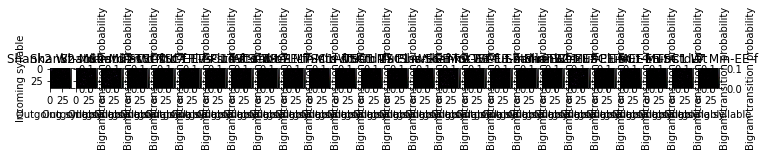

In [13]:
import os
import matplotlib.pyplot as plt
from moseq2_viz.model.util import parse_model_results, relabel_by_usage
from moseq2_viz.model.trans_graph import get_trans_graph_groups, get_group_trans_mats

# syllable threshold defined above. Uncomment if you want to manually set
max_syllables = 40

# select a transition matrix normalization method
normalize = 'bigram' # options: bigram, columns, rows

# load your model
model_path = progress_paths['model_path']
model_data = parse_model_results(model_path)
model_data['labels'] = relabel_by_usage(model_data['labels'], count='usage')[0]

# Get modeled session uuids to compute group-mean transition graph for each group
label_group, uuids = get_trans_graph_groups(model_data)
##########
uuidsgroups,indexgroups=np.unique(mean_df['uuid'],return_index=True)
for i in range(len(uuidsgroups)):
    label_group[uuids.index(uuidsgroups[i])]=mean_df['group'][indexgroups[i]]
#########
group = list(set(label_group))
# compute transition matrices and usages for each group
print('Group(s):', ', '.join(group))
trans_mats, usages = get_group_trans_mats(model_data['labels'], label_group, group, max_syllables, normalize=normalize)

fig, ax = plt.subplots(1, len(group), figsize=(12, 8), sharex=False, sharey=True)
title_map = dict(bigram='Bigram', columns='Incoming', rows='Outgoing')

# max color threshold for graphs - set to any value 
color_lim = max([x.max() for x in trans_mats])

for i, g in enumerate(group):
    h = ax[i].imshow(trans_mats[i][:max_syllables,:max_syllables], cmap='cubehelix', vmax=color_lim)
    if i == 0:
        ax[i].set_ylabel('Incoming syllable')
    cb = fig.colorbar(h, ax=ax[i], fraction=0.046, pad=0.04)
    cb.set_label(f'{title_map[normalize]} transition probability')
    ax[i].set_xlabel('Outgoing syllable')
    ax[i].set_title(g)

# save transition matrix figure
os.makedirs(progress_paths['plot_path'], exist_ok=True)
for ext in ('pdf', 'png'):
    fig.savefig(join(progress_paths['plot_path'], f'{normalize}_tansition_matrix.{ext}'))

In [14]:
import numpy as np
from os.path import join

save_path = progress_paths['model_session_path']

for group_name, tm, usage in zip(group, trans_mats, usages):
    out = join(save_path, f'{group_name}_{normalize}_transition_matrix.csv')
    np.savetxt(out, tm, delimiter=',')  # save TM as csv file
    out = join(save_path, f'{group_name}_syllable_counts.csv')
    np.savetxt(out, np.array(list(usage.items())), delimiter=',', header='syllable id,counts')  # save usage mapping as csv